# IMPORTING LIBRARIES

In [69]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# READING THE DATASET

In [61]:
data = pd.read_csv(r"C:\Users\deeks\Desktop\SET\Train.csv")

In [62]:
data.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

# CHECKING THE DATASET

In [63]:
data.dtypes

date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
dtype: object

In [64]:
#No Null Values
data.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [66]:
data.date_time = pd.to_datetime(data.date_time)

In [67]:
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['dayofweek'] = data['date_time'].dt.dayofweek.replace([0,1,2,3,4,5,6],['monday','tuesday','wednesday','thursday','friday','saturday','sunday'])
data['hour'] = data['date_time'].dt.hour
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofweek,hour
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,tuesday,9
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,tuesday,10
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,tuesday,11
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,tuesday,12
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,tuesday,13


In [59]:
data.dtypes

date_time                                                  datetime64[ns]
air_pollution_index                                                 int64
humidity                                                            int64
wind_speed                                                          int64
wind_direction                                                      int64
visibility_in_miles                                                 int64
dew_point                                                           int64
temperature                                                       float64
rain_p_h                                                          float64
snow_p_h                                                          float64
clouds_all                                                          int64
traffic_volume                                                      int64
is_holiday_Memorial Day                                             uint8
is_holiday_New Years Day              

In [10]:
data.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,year,month,day,hour
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163,2014.639822,6.407674,15.646874,11.404385
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289,1.572845,3.543241,8.700568,6.951078
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000,2013.000000,3.000000,8.000000,5.000000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000,2015.000000,6.000000,16.000000,11.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000,2016.000000,10.000000,23.000000,17.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000,2017.000000,12.000000,31.000000,23.000000


In [11]:
data.shape

(33750, 20)

# Starting Data Visualisation using graphs

Text(0, 0.5, 'Traffic Volume')

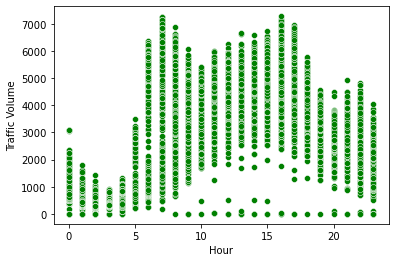

In [12]:
sns.scatterplot(x = data['hour'], y = data['traffic_volume'], color="green")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")

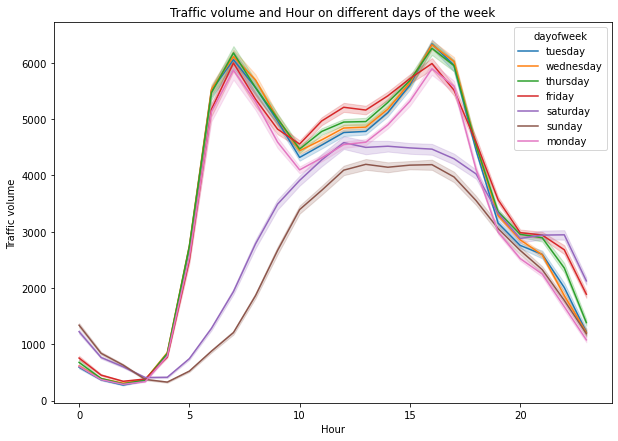

In [13]:
plt.figure(figsize=(10,7))
sns.lineplot(x=data['hour'],y=data['traffic_volume'],hue=data['dayofweek']);
plt.title("Traffic volume and Hour on different days of the week");
plt.xlabel("Hour");
plt.ylabel("Traffic volume");

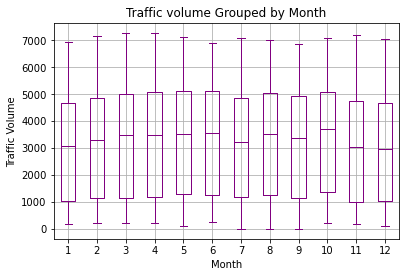

In [14]:
weather = data.groupby('weather_type')
data.boxplot('traffic_volume',by = 'month', color="purple");
title_boxplot="Traffic volume Grouped by Month"
plt.title(title_boxplot)
plt.suptitle('')
plt.xlabel("Month");
plt.ylabel("Traffic Volume");

In [15]:
percentile25 = data['humidity'].quantile(0.25)
percentile75 = data['humidity'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

C:\Users\deeks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\deeks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deeks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

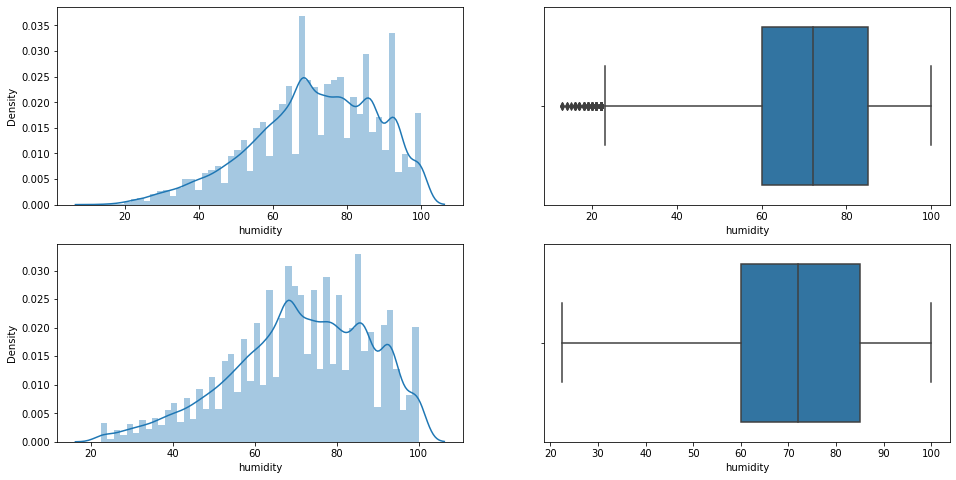

In [16]:
# Capping the dataset to remove the outliers
new_data_cap = data.copy()
new_data_cap['humidity'] = np.where(
    new_data_cap['humidity'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap['humidity'] < lower_limit,
        lower_limit,
        new_data_cap['humidity']
    )
)
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['humidity'])
plt.subplot(2,2,2)
sns.boxplot(data['humidity'])
plt.subplot(2,2,3)
sns.distplot(new_data_cap['humidity'])
plt.subplot(2,2,4)
sns.boxplot(new_data_cap['humidity'])
plt.show()

Text(452.03309659090917, 0.5, 'Traffic')

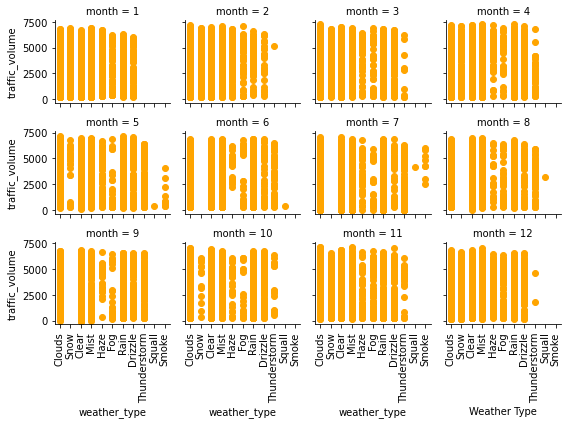

In [17]:
g=sns.FacetGrid(col='month',data=data,col_wrap=4,height=2)
g.map(plt.scatter,"weather_type","traffic_volume",color="orange")
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.xlabel("Weather Type");
plt.ylabel("Traffic")

In [18]:
data['weather_type'].value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

In [19]:
def tempconvert(t):
    return t-273.15

In [20]:
data['temperature']=data['temperature'].apply(tempconvert)

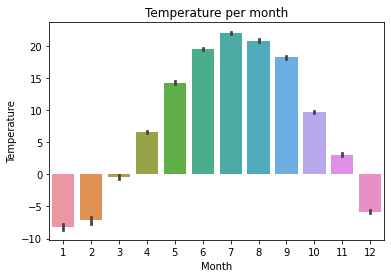

In [21]:
sns.barplot(y='temperature',x='month',data=data);
plt.title("Temperature per month");
plt.xlabel("Month");
plt.ylabel("Temperature");

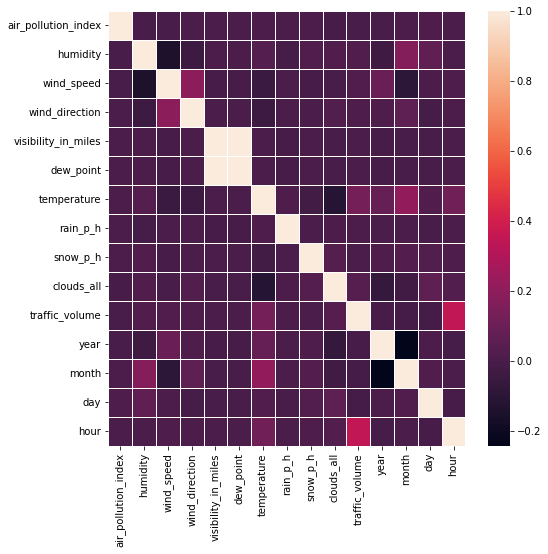

In [68]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),linewidth=1);